In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

%matplotlib inline

# Factors that affect Fb Campaigns 

<b> Targeting </b>
<ul>
    <li> Age </li>
    <li> Gender </li>
    <li> Location </li>
    <li> Interest and Behaviour </li>
</ul>

<b> Ad Operations </b>
<ul>
    <li> Time Slot </li>
    <li> Day of Week </li>
    <li> Device </li>
    <li> Platform </li>
    <li> Frequency </li>
</ul>

<b> Ad Appearance </b>
<ul>
    <li> Ad Format </li>
    <li> Ad Copy  </li>
    <li> Device </li>
    <li> Platform </li>
    <li> Frequency </li>
</ul>

<b> Budget </b>


# Facebook Targeting Permutuations and Combinations 

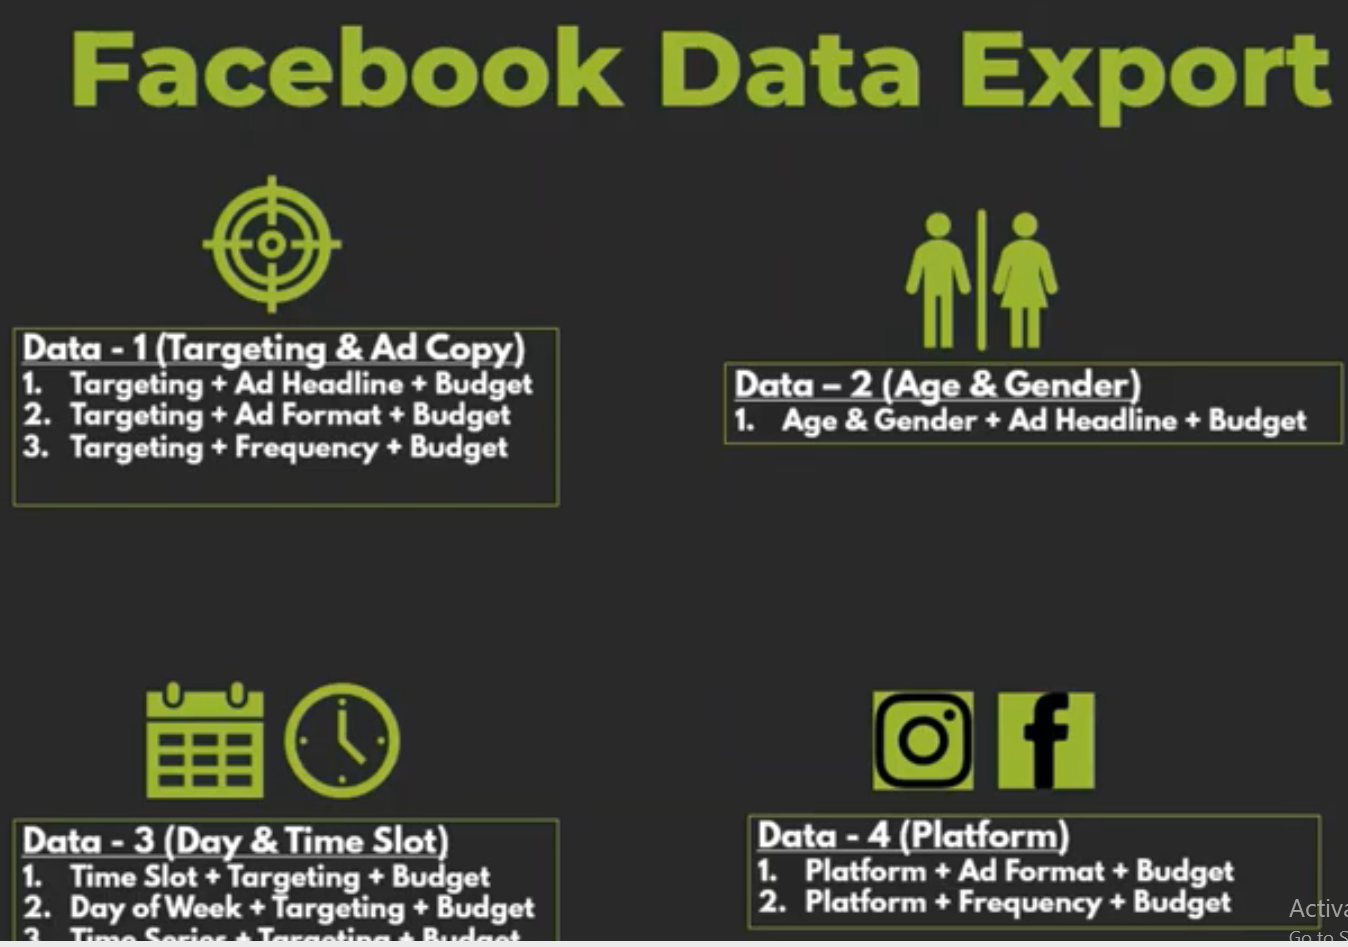


In [2]:
# To convert into full screen Python 

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

In [25]:
data = pd.read_csv('UCMAS - 4. Report Platform.csv')

# Data Cleaning 

In [26]:
data.drop(['Reporting Starts', 'Reporting Ends'], axis = 1, inplace = True)

In [27]:
data.shape

(8, 16)

In [28]:
data.isnull().sum()

Campaign Name                       0
Ad Set Name                         0
Ad Name                             0
Platform                            0
Reach                               0
Impressions                         0
Frequency                           0
Result Type                         0
Results                             0
Amount Spent (INR)                  0
Cost per Result                     0
Starts                              0
Ends                                0
Clicks (All)                        0
CTR (All)                           0
CPM (Cost per 1,000 Impressions)    0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
Campaign Name                       8 non-null object
Ad Set Name                         8 non-null object
Ad Name                             8 non-null object
Platform                            8 non-null object
Reach                               8 non-null int64
Impressions                         8 non-null int64
Frequency                           8 non-null float64
Result Type                         8 non-null object
Results                             8 non-null int64
Amount Spent (INR)                  8 non-null float64
Cost per Result                     8 non-null float64
Starts                              8 non-null object
Ends                                8 non-null object
Clicks (All)                        8 non-null int64
CTR (All)                           8 non-null float64
CPM (Cost per 1,000 Impressions)    8 non-null float64
dtypes: float64(5), int64(4), obje

In [30]:
data.drop(['Result Type'], axis = 1, inplace = True)

In [39]:
data

,Campaign Name,Ad Set Name,Ad Name,Platform,Reach,Impressions,Frequency,Results,Amount Spent (INR),Cost per Result,Starts,Ends,Clicks (All),CTR (All),"CPM (Cost per 1,000 Impressions)",CPC,Ad Format
0,UCMAS Online Classes Ghana 24th Sept 2020,W + Parents + Intersts,Video,facebook,21748,51214,2 to 3,58,5147.861816,88.756238,2020-09-24,Ongoing,1055,2.059984,100.516691,4.879490,Video
1,UCMAS Online Classes Ghana 01st Oct 2020,W + Parents + Intersts,Image,facebook,22433,51771,2 to 3,35,4462.090932,127.488312,2020-10-01,Ongoing,1057,2.041684,86.189004,4.221467,Image
2,UCMAS 2nd Ad Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Image Ad,facebook,7868,25408,3 to 4,29,3625.990000,125.034138,2020-09-15,Ongoing,708,2.786524,142.710564,5.121455,Image
3,UCMAS Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Testimonial Video Ad,instagram,11788,18222,1 to 2,15,2760.595151,184.039677,2020-09-13,Ongoing,81,0.444518,151.497923,34.081422,Video
4,UCMAS Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Testimonial Video Ad,facebook,8044,21142,2 to 3,27,2705.574849,100.206476,2020-09-13,Ongoing,715,3.381894,127.971566,3.784021,Video
5,UCMAS 2nd Ad Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Image Ad,instagram,9708,15018,1 to 2,14,2377.950000,169.853571,2020-09-15,Ongoing,48,0.319616,158.339992,49.540625,Image
6,UCMAS Online Classes Ghana 24th Sept 2020,W + Parents + Intersts,Video,instagram,4132,5264,1 to 2,5,760.308184,152.061637,2020-09-24,Ongoing,35,0.664894,144.435445,21.723091,Video
7,UCMAS Online Classes Ghana 01st Oct 2020,W + Parents + Intersts,Image,instagram,3704,5007,1 to 2,11,664.019068,60.365370,2020-10-01,Ongoing,51,1.018574,132.618148,13.019982,Image


# Feature engineering 

## 1. Create Cost per Click Column

In [31]:
data['CPC'] = data['Amount Spent (INR)'] / data['Clicks (All)']

## 2. Put Frequency into buckets 

In [32]:
data['Frequency'] = data['Frequency'].apply(lambda x: '1 to 2' if x<2
                                                    else '2 to 3' if x >=2 and x<3
                                                    else '3 to 4' if x >=3 and x<4
                                                    else '4 to 5' if x >=4 and x<5
                                                    else 'More than 5')

In [33]:
data.to_csv('3.1 Report_Day_Time_Cleaned.csv')

# Data Visualization 

## 1. Effect of Platform + Ad

### Generic View 

In [34]:
ad_dict = {'Image Ad': 'Image', 'Testimonial Video Ad': 'Video', 'Image': 'Image', 'Video':'Video'}
data['Ad Format'] = data['Ad Name'].map(ad_dict)

In [35]:
data

,Campaign Name,Ad Set Name,Ad Name,Platform,Reach,Impressions,Frequency,Results,Amount Spent (INR),Cost per Result,Starts,Ends,Clicks (All),CTR (All),"CPM (Cost per 1,000 Impressions)",CPC,Ad Format
0,UCMAS Online Classes Ghana 24th Sept 2020,W + Parents + Intersts,Video,facebook,21748,51214,2 to 3,58,5147.861816,88.756238,2020-09-24,Ongoing,1055,2.059984,100.516691,4.879490,Video
1,UCMAS Online Classes Ghana 01st Oct 2020,W + Parents + Intersts,Image,facebook,22433,51771,2 to 3,35,4462.090932,127.488312,2020-10-01,Ongoing,1057,2.041684,86.189004,4.221467,Image
2,UCMAS 2nd Ad Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Image Ad,facebook,7868,25408,3 to 4,29,3625.990000,125.034138,2020-09-15,Ongoing,708,2.786524,142.710564,5.121455,Image
3,UCMAS Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Testimonial Video Ad,instagram,11788,18222,1 to 2,15,2760.595151,184.039677,2020-09-13,Ongoing,81,0.444518,151.497923,34.081422,Video
4,UCMAS Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Testimonial Video Ad,facebook,8044,21142,2 to 3,27,2705.574849,100.206476,2020-09-13,Ongoing,715,3.381894,127.971566,3.784021,Video
5,UCMAS 2nd Ad Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Image Ad,instagram,9708,15018,1 to 2,14,2377.950000,169.853571,2020-09-15,Ongoing,48,0.319616,158.339992,49.540625,Image
6,UCMAS Online Classes Ghana 24th Sept 2020,W + Parents + Intersts,Video,instagram,4132,5264,1 to 2,5,760.308184,152.061637,2020-09-24,Ongoing,35,0.664894,144.435445,21.723091,Video
7,UCMAS Online Classes Ghana 01st Oct 2020,W + Parents + Intersts,Image,instagram,3704,5007,1 to 2,11,664.019068,60.365370,2020-10-01,Ongoing,51,1.018574,132.618148,13.019982,Image


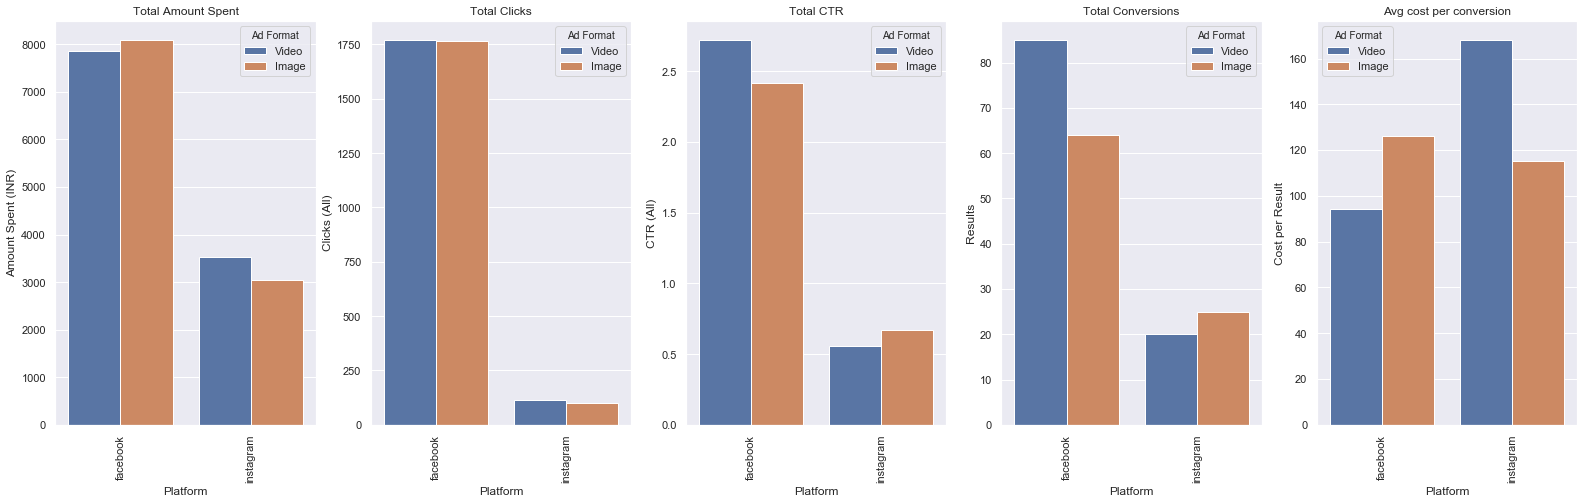

In [36]:
plt.figure(figsize=(22,7))

#subplot 1
plt.subplot(1,5,1)
sns.barplot(x = 'Platform', y= 'Amount Spent (INR)', data = data, hue = 'Ad Format', estimator = np.sum, ci = None)
plt.title("Total Amount Spent")
plt.xticks(rotation = 90)

#subplot 2 
plt.subplot(1,5,2)
sns.barplot(x = 'Platform', y= 'Clicks (All)', data = data, hue = 'Ad Format', estimator = np.sum, ci = None)
plt.title("Total Clicks")
plt.xticks(rotation = 90)


#subplot 3 
plt.subplot(1,5,3)
sns.barplot(x = 'Platform', y= 'CTR (All)', data = data, hue = 'Ad Format', estimator = np.mean, ci = None)
plt.title("Total CTR")
plt.xticks(rotation = 90)


#subplot 4
plt.subplot(1,5,4)
sns.barplot(x = 'Platform', y= 'Results', data = data, hue = 'Ad Format', estimator = np.sum, ci = None)
plt.title("Total Conversions")
plt.xticks(rotation = 90)

#subplot 5
plt.subplot(1,5,5)
sns.barplot(x = 'Platform', y= 'Cost per Result', data = data, hue = 'Ad Format', estimator = np.mean, ci = None)
plt.title("Avg cost per conversion")
plt.xticks(rotation = 90)

#subplot 6 
#plt.subplot(1,6,6)
#sns.barplot(x = 'Platform', y= 'Result Rate', data = data, estimator = np.mean, ci = None)
#plt.title("Conversion Rate")
#plt.xticks(rotation = 90)

plt.tight_layout(pad = 0.7)
plt.show()

### Granular View 

In [41]:
data['Campaign Name'].value_counts()

UCMAS 2nd Ad Demo Class 19th September       2
UCMAS Demo Class 19th September              2
UCMAS Online Classes Ghana 01st Oct 2020     2
UCMAS Online Classes Ghana 24th Sept 2020    2
Name: Campaign Name, dtype: int64

In [43]:
camp_dict = {'UCMAS Online Classes Ghana 24th Sept 2020' :'Online Classes', 'UCMAS Online Classes Ghana 01st Oct 2020': 'Online Classes', 'UCMAS 2nd Ad Demo Class 19th September':'Demo Classes', 'UCMAS Demo Class 19th September': 'Demo Classes'}
data['Camp_Mix'] = data['Campaign Name'].map(camp_dict)

In [44]:
data

,Campaign Name,Ad Set Name,Ad Name,Platform,Reach,Impressions,Frequency,Results,Amount Spent (INR),Cost per Result,Starts,Ends,Clicks (All),CTR (All),"CPM (Cost per 1,000 Impressions)",CPC,Ad Format,Camp_Mix
0,UCMAS Online Classes Ghana 24th Sept 2020,W + Parents + Intersts,Video,facebook,21748,51214,2 to 3,58,5147.861816,88.756238,2020-09-24,Ongoing,1055,2.059984,100.516691,4.879490,Video,Online Classes
1,UCMAS Online Classes Ghana 01st Oct 2020,W + Parents + Intersts,Image,facebook,22433,51771,2 to 3,35,4462.090932,127.488312,2020-10-01,Ongoing,1057,2.041684,86.189004,4.221467,Image,Online Classes
2,UCMAS 2nd Ad Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Image Ad,facebook,7868,25408,3 to 4,29,3625.990000,125.034138,2020-09-15,Ongoing,708,2.786524,142.710564,5.121455,Image,Demo Classes
3,UCMAS Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Testimonial Video Ad,instagram,11788,18222,1 to 2,15,2760.595151,184.039677,2020-09-13,Ongoing,81,0.444518,151.497923,34.081422,Video,Demo Classes
4,UCMAS Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Testimonial Video Ad,facebook,8044,21142,2 to 3,27,2705.574849,100.206476,2020-09-13,Ongoing,715,3.381894,127.971566,3.784021,Video,Demo Classes
5,UCMAS 2nd Ad Demo Class 19th September,"UCMAS Demo Class, Ghana , W 24-35, Parents + I...",Image Ad,instagram,9708,15018,1 to 2,14,2377.950000,169.853571,2020-09-15,Ongoing,48,0.319616,158.339992,49.540625,Image,Demo Classes
6,UCMAS Online Classes Ghana 24th Sept 2020,W + Parents + Intersts,Video,instagram,4132,5264,1 to 2,5,760.308184,152.061637,2020-09-24,Ongoing,35,0.664894,144.435445,21.723091,Video,Online Classes
7,UCMAS Online Classes Ghana 01st Oct 2020,W + Parents + Intersts,Image,instagram,3704,5007,1 to 2,11,664.019068,60.365370,2020-10-01,Ongoing,51,1.018574,132.618148,13.019982,Image,Online Classes


Text(0.5, 0.98, 'Avg Cost per Conversion')

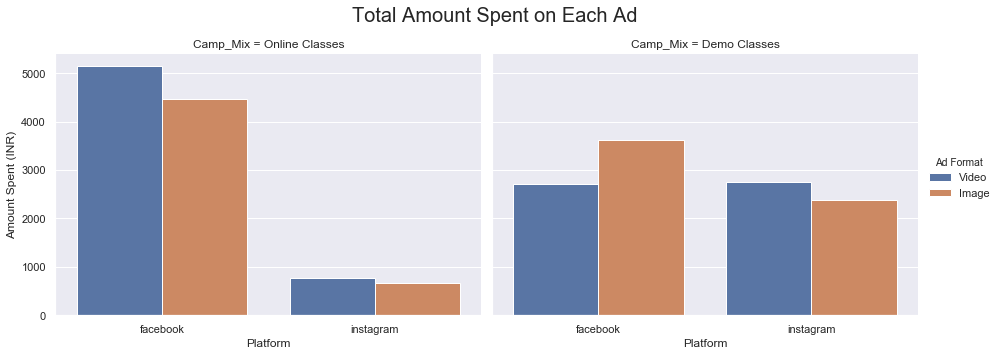

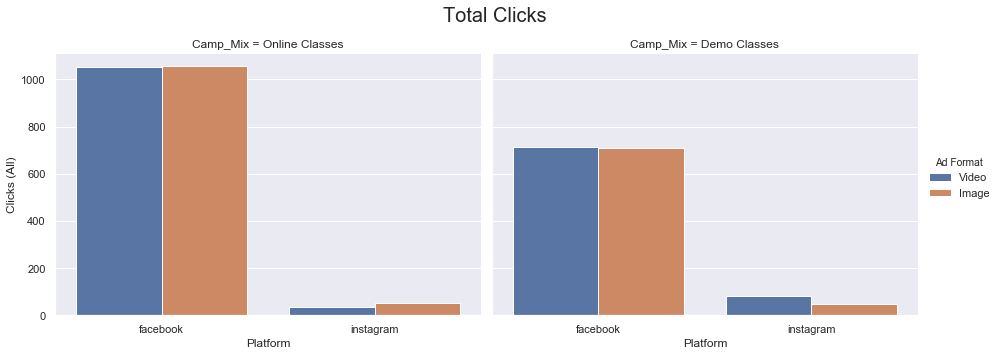

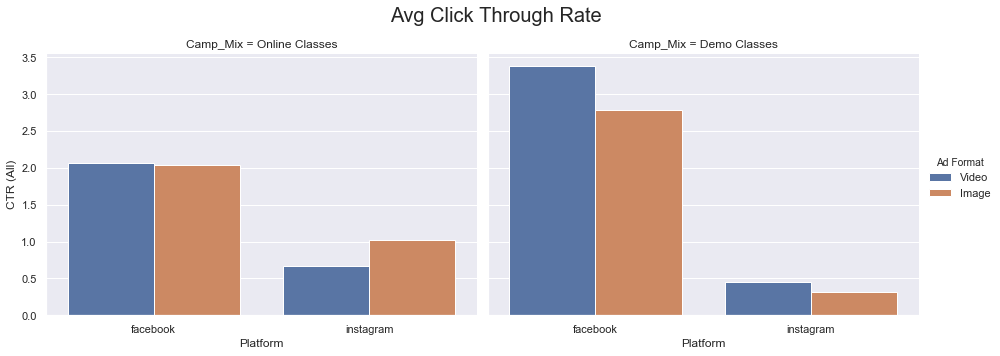

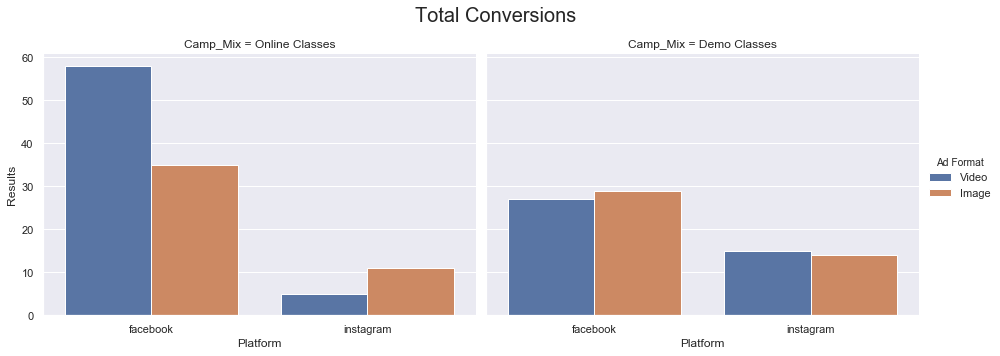

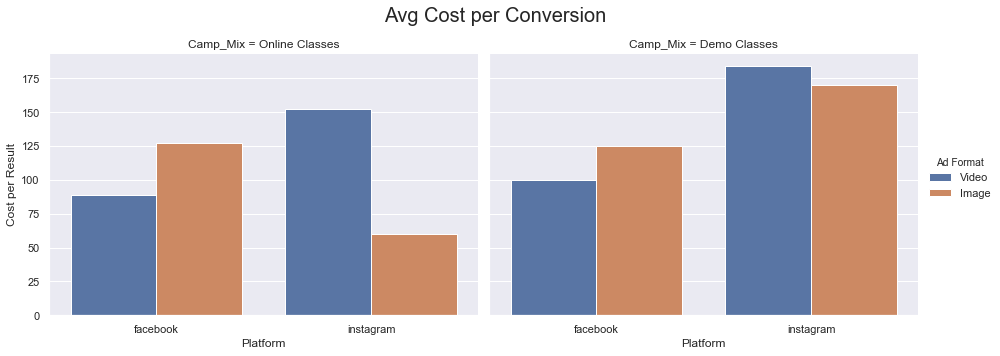

In [47]:
sns.catplot(x = 'Platform', y = 'Amount Spent (INR)', col = 'Camp_Mix', data = data, hue = 'Ad Format', kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Amount Spent on Each Ad', fontsize = 20)

sns.catplot(x = 'Platform', y = 'Clicks (All)', col = 'Camp_Mix', data = data, hue = 'Ad Format', kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Clicks', fontsize = 20)

sns.catplot(x = 'Platform', y = 'CTR (All)', col = 'Camp_Mix', data = data, hue = 'Ad Format', kind = 'bar', aspect = 1.3, estimator = np.mean, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg Click Through Rate', fontsize = 20)

sns.catplot(x = 'Platform', y = 'Results', col = 'Camp_Mix', data = data, hue = 'Ad Format', kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Conversions', fontsize = 20)

sns.catplot(x = 'Platform', y = 'Cost per Result', col = 'Camp_Mix', data = data, hue = 'Ad Format', kind = 'bar', aspect = 1.3, estimator = np.mean, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg Cost per Conversion', fontsize = 20)

#sns.catplot(y = 'Time', x = 'Result Rate', col = 'Ad Name', data = data, kind = 'bar', aspect = 1.3, estimator = np.mean, ci = None)
#plt.subplots_adjust(top = 0.85)
#plt.suptitle('Avg Conversion Rate', fontsize = 20)

## 2. Effect of Frequency and Platform on Result 

In [48]:
data.sort_values(by=['Frequency'], inplace = True)

# Generic View

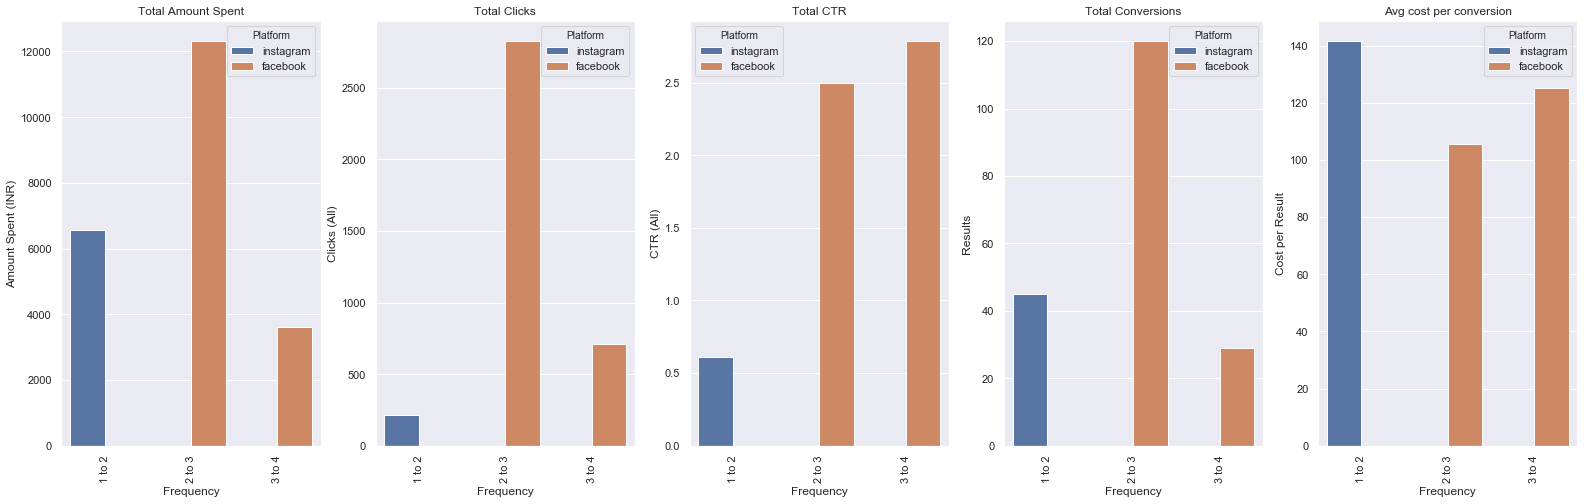

In [49]:
plt.figure(figsize=(22,7))

#subplot 1
plt.subplot(1,5,1)
sns.barplot(x = 'Frequency', y= 'Amount Spent (INR)', hue = 'Platform', data = data, estimator = np.sum, ci = None)
plt.title("Total Amount Spent")
plt.xticks(rotation = 90)

#subplot 2 
plt.subplot(1,5,2)
sns.barplot(x = 'Frequency', y= 'Clicks (All)', hue = 'Platform', data = data, estimator = np.sum, ci = None)
plt.title("Total Clicks")
plt.xticks(rotation = 90)


#subplot 3 
plt.subplot(1,5,3)
sns.barplot(x = 'Frequency', y= 'CTR (All)', hue = 'Platform', data = data, estimator = np.mean, ci = None)
plt.title("Total CTR")
plt.xticks(rotation = 90)


#subplot 4
plt.subplot(1,5,4)
sns.barplot(x = 'Frequency', y= 'Results', hue = 'Platform', data = data, estimator = np.sum, ci = None)
plt.title("Total Conversions")
plt.xticks(rotation = 90)

#subplot 5
plt.subplot(1,5,5)
sns.barplot(x = 'Frequency', y= 'Cost per Result', hue = 'Platform', data = data, estimator = np.mean, ci = None)
plt.title("Avg cost per conversion")
plt.xticks(rotation = 90)

#subplot 6 
#plt.subplot(1,6,6)
#sns.barplot(x = 'Day of Week', y= 'Result Rate', data = data, estimator = np.mean, ci = None)
#plt.title("Conversion Rate")
#plt.xticks(rotation = 90)

plt.tight_layout(pad = 0.7)
plt.show()

Since our Ad has not been shown much on Instagram the platform here focusses on results on FB mostly